In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score, validation_curve
from sklearn.tree import DecisionTreeRegressor
from math import sqrt
plt.style.use('seaborn')
% matplotlib inline

pd.options.display.max_columns = 999
df_s = pd.read_csv("energy_data_variables_final_normalized.csv", usecols = ['DOLLAREL', 'DRYRUSEM', 'USEWASHM', 'TOTROOMS', 'LGTOUTNUM', 'BEDROOMS', 'DRYRFUEL', 'TOTSQFT_EN', 'NUMCFAN', 'TVCOLOR', 'WINDOWS', 'NCOMBATH', 'LGTINNUM', 'ELWATER', 'FUELH2O', 'OTHROOMS', 'WHEATAGE', 'NUMFRIG', 'NHSLDMEM', 'AGERFRI2', 'LOCRFRI2', 'FUELHEAT', 'THERMAINAC', 'NUMFREEZ', 'KWH_M'])

In [2]:
df_s.shape

(5686, 25)

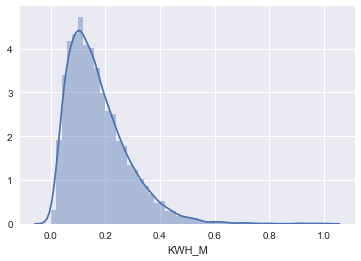

In [3]:
# Check Density Plot for Target Variable
ax = sns.distplot(df_s.KWH_M)
plt.show()

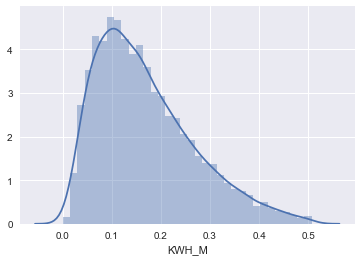

In [4]:
# Remove outliers that are more than 3 standard deviations from the mean 
df_s = df_s[np.abs(df_s["KWH_M"]-df_s["KWH_M"].mean())<=(3*df_s["KWH_M"].std())]

# Re-check distribution skewness for the target variable (KWH_M)
ax = sns.distplot(df_s.KWH_M)
plt.show()

In [5]:
df_s.shape

(5618, 25)

In [6]:
# Set X, Y Variables

X = df_s.values[:, 0:24]
Y = df_s.values[:, 24]

# Split data into training and testing sets
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.33, random_state = 42)

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
# GridSearchCV - Decision Tree Regression

tree = DecisionTreeRegressor()
parameters = {"max_depth": range(2,5), "random_state":[0], "min_samples_leaf": [6,7,8,9]}
grid_obj = GridSearchCV(estimator=tree,param_grid=parameters, cv=2, scoring='neg_mean_squared_error')
grid_fit =grid_obj.fit(X, Y)

In [8]:
results = pd.DataFrame(grid_obj.cv_results_)
print (results)

    mean_fit_time  mean_score_time  mean_test_score  mean_train_score  \
0        0.007719         0.000833        -0.002769         -0.002658   
1        0.004345         0.000462        -0.002769         -0.002658   
2        0.004426         0.000708        -0.002769         -0.002658   
3        0.004589         0.000451        -0.002769         -0.002658   
4        0.005826         0.000481        -0.002346         -0.002142   
5        0.005739         0.000472        -0.002346         -0.002142   
6        0.005744         0.000468        -0.002346         -0.002142   
7        0.005935         0.000471        -0.002346         -0.002142   
8        0.007257         0.000493        -0.002176         -0.001855   
9        0.009324         0.000570        -0.002176         -0.001855   
10       0.007405         0.000499        -0.002176         -0.001856   
11       0.007306         0.000512        -0.002176         -0.001856   

   param_max_depth param_min_samples_leaf param_ra

/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/williamadams/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/Users/willi

In [9]:
# Calculate RMSE

tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mse_scores = cross_val_score(tree, X, Y, cv=shuffle, scoring = "neg_mean_squared_error")
mse_scores1 = -mse_scores 
rmse_scores = np.sqrt(mse_scores1)

print ("The RMSE scores are %s" 
       % (rmse_scores))
print ("The mean of the RMSE scores is %f" 
       %(rmse_scores.mean()))

The RMSE scores are [0.04427881 0.04471953 0.04845326 0.04288799 0.04590771 0.04519182
 0.04449414 0.04327923 0.04553205 0.0449773 ]
The mean of the RMSE scores is 0.044972


In [10]:
# Calculate MAE 

tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
mae_scores = cross_val_score(tree, X, Y, cv=shuffle, scoring = "neg_mean_absolute_error")
mae_scores_ = -mae_scores

print ("The mean absolute error scores are %s" 
       % (mae_scores_))
print ("The mean of the mean absolute error scores is %f" 
       %(mae_scores_.mean()))

The mean absolute error scores are [0.03048001 0.03128721 0.03322715 0.02981402 0.0312723  0.03119675
 0.03090197 0.03069451 0.03197668 0.03102857]
The mean of the mean absolute error scores is 0.031188


In [11]:
# Calculate VAR 
from sklearn.metrics import mean_absolute_error

tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

ev_scores = cross_val_score(tree, X, Y, cv=shuffle, scoring = "explained_variance")

print ("The explained variance scores are %s" 
       % (ev_scores))
print ("The mean of the explained variance scores is %f" 
       %(ev_scores.mean()))

The explained variance scores are [0.79765818 0.81278901 0.77843026 0.80298788 0.78000227 0.7683882
 0.78805723 0.8176111  0.79015051 0.81877588]
The mean of the explained variance scores is 0.795485


In [12]:
# Calculate R2

tree = DecisionTreeRegressor(max_depth=4, min_samples_leaf=6)
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)

r_scores = cross_val_score(tree, X, Y, cv=shuffle, scoring = "r2")

print ("The R2 scores are %s" 
       % (r_scores))
print ("The mean of the R2 scores is %f" 
       %(r_scores.mean()))

The R2 scores are [0.79764053 0.81195592 0.77841854 0.80279759 0.77991769 0.76787507
 0.78796604 0.81760873 0.79014991 0.81874509]
The mean of the R2 scores is 0.795308


Text(0.5,1,'Decision Trees Regression')

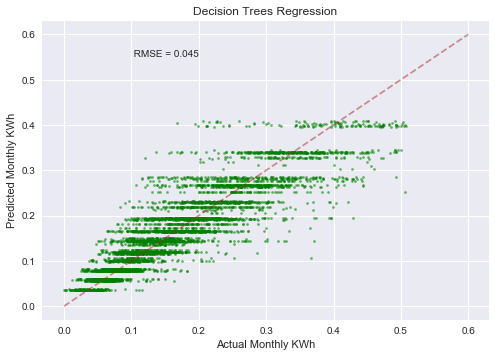

In [13]:
# Plot the Predict vs. Actual Values Using CrossValPredict
from sklearn.model_selection import cross_val_predict
shuffle = KFold(n_splits=10, shuffle=True, random_state=42)
predicted_tree = cross_val_predict(tree, X, Y, cv=shuffle)

%matplotlib inline
plt.style.use('seaborn')
plt.scatter(Y, predicted_tree, s = 5, color = 'green', alpha = 0.6)
plt.plot([0,0.6], [0,0.6], "b--", color = "brown", alpha = 0.5)
plt.xlabel("Actual Monthly KWh")
plt.ylabel("Predicted Monthly KWh")
plt.text(0.1,0.55, ' RMSE = {}'.format(round(sqrt(mean_squared_error(Y, predicted_tree)), 4)))
plt.title('Decision Trees Regression')